In [291]:
import os
import pandas as pd
import scipy.io
path = "/Users/jorgerag/Documents/UCSD/courses/capstone/data/photometry_analog/PV Population/"
os.chdir(path)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [292]:
# get filename info
def get_filename_info(df, filename):
    filename_info = filename.split("_")
    filename_info_sub = filename_info[2].split("-")
    df['subject'] = filename_info[1].strip()
    df['threshold'] = int(filename_info_sub[0].strip())
    df['day'] = filename_info_sub[1].replace(".mat", "").strip()

    return df

In [293]:
# get behavioral information
def get_beh(mat, filename):
    beh_data = mat['GCAMP']['beh_data'][0][0]
    beh_data = pd.DataFrame(beh_data)

    new_header = beh_data.iloc[0] #grab the first row for the header
    beh_data = beh_data[1:] #take the data less the header row
    beh_data.columns = new_header

    beh_data = get_filename_info(beh_data, filename)

    return beh_data


In [294]:
# get photometry information
def get_photo(mat, filename):
    photo_data = pd.DataFrame()
    photo_data['timestamp'] = pd.DataFrame(mat['GCAMP']['raw_gcamptimestamps'][0][0])
    photo_data['gcamp'] = pd.DataFrame(mat['GCAMP']['raw_gcampdata'][0][0])

    photo_data = get_filename_info(photo_data, filename)

    return photo_data

In [295]:
behavioral_data = pd.DataFrame()
photometry_data = pd.DataFrame()
for file in os.listdir(os.curdir):
    mat = scipy.io.loadmat(os.path.join(os.curdir, file))
    print(file)
    # behavioral dataframe
    beh_data = get_beh(mat, file)
    behavioral_data = pd.concat([behavioral_data, beh_data])
    # photometry dataframe
    photo_data = get_photo(mat, file)
    photometry_data = pd.concat([photometry_data, photo_data])

behavioral_data.columns = ["timestamp", "lp", "he", "rew", "subject", "threshold", "day"]

GCAMP_4268_1600-7.mat
GCAMP_3316_1600-5.mat
GCAMP_3316_1600-4.mat
GCAMP_4268_1600-6.mat
GCAMP_4268_1600-4.mat
GCAMP_3316_1600-6.mat
GCAMP_4268_1600-5.mat
GCAMP_4268_1600-1.mat
GCAMP_3316_1600-3.mat
GCAMP_3316_1600-2.mat
GCAMP_4268_1600-2.mat
GCAMP_4268_1600-3.mat
GCAMP_4269_1600-8.mat
GCAMP_3317_1600-3.mat
GCAMP_3203_1600-3.mat
GCAMP_4269_1600-1.mat
GCAMP_3203_1600-2.mat
GCAMP_4269_1600-3.mat
GCAMP_3317_1600-1.mat
GCAMP_3317_1600-5.mat
GCAMP_4269_1600-7.mat
GCAMP_4269_1600-6.mat
GCAMP_4269_1600-5.mat
GCAMP_3201_1600-2.mat
GCAMP_3315_1600-3.mat
GCAMP_3204_1600-6.mat
GCAMP_3204_1600-4.mat
GCAMP_3204_1600-5.mat
GCAMP_4268_1600-8.mat
GCAMP_3201_1600-4.mat
GCAMP_3201_1600-5.mat
GCAMP_3315_1600-6.mat
GCAMP_3201_1600-6.mat


In [296]:
# Data correction
# Get successful lp
def correction1(x):
    if x["subject"] == "3204" and x["day"] == "4":
        return x["gcamp"]/10
    else:
        return x["gcamp"]

def correction2(x):
    if x["gcamp_mod"] > 100000:
        return 100000
    else:
        return x["gcamp_mod"]

photometry_data["gcamp_mod"] = photometry_data.apply(correction1, axis=1)
photometry_data["gcamp_mod"] = photometry_data.apply(correction2, axis=1)

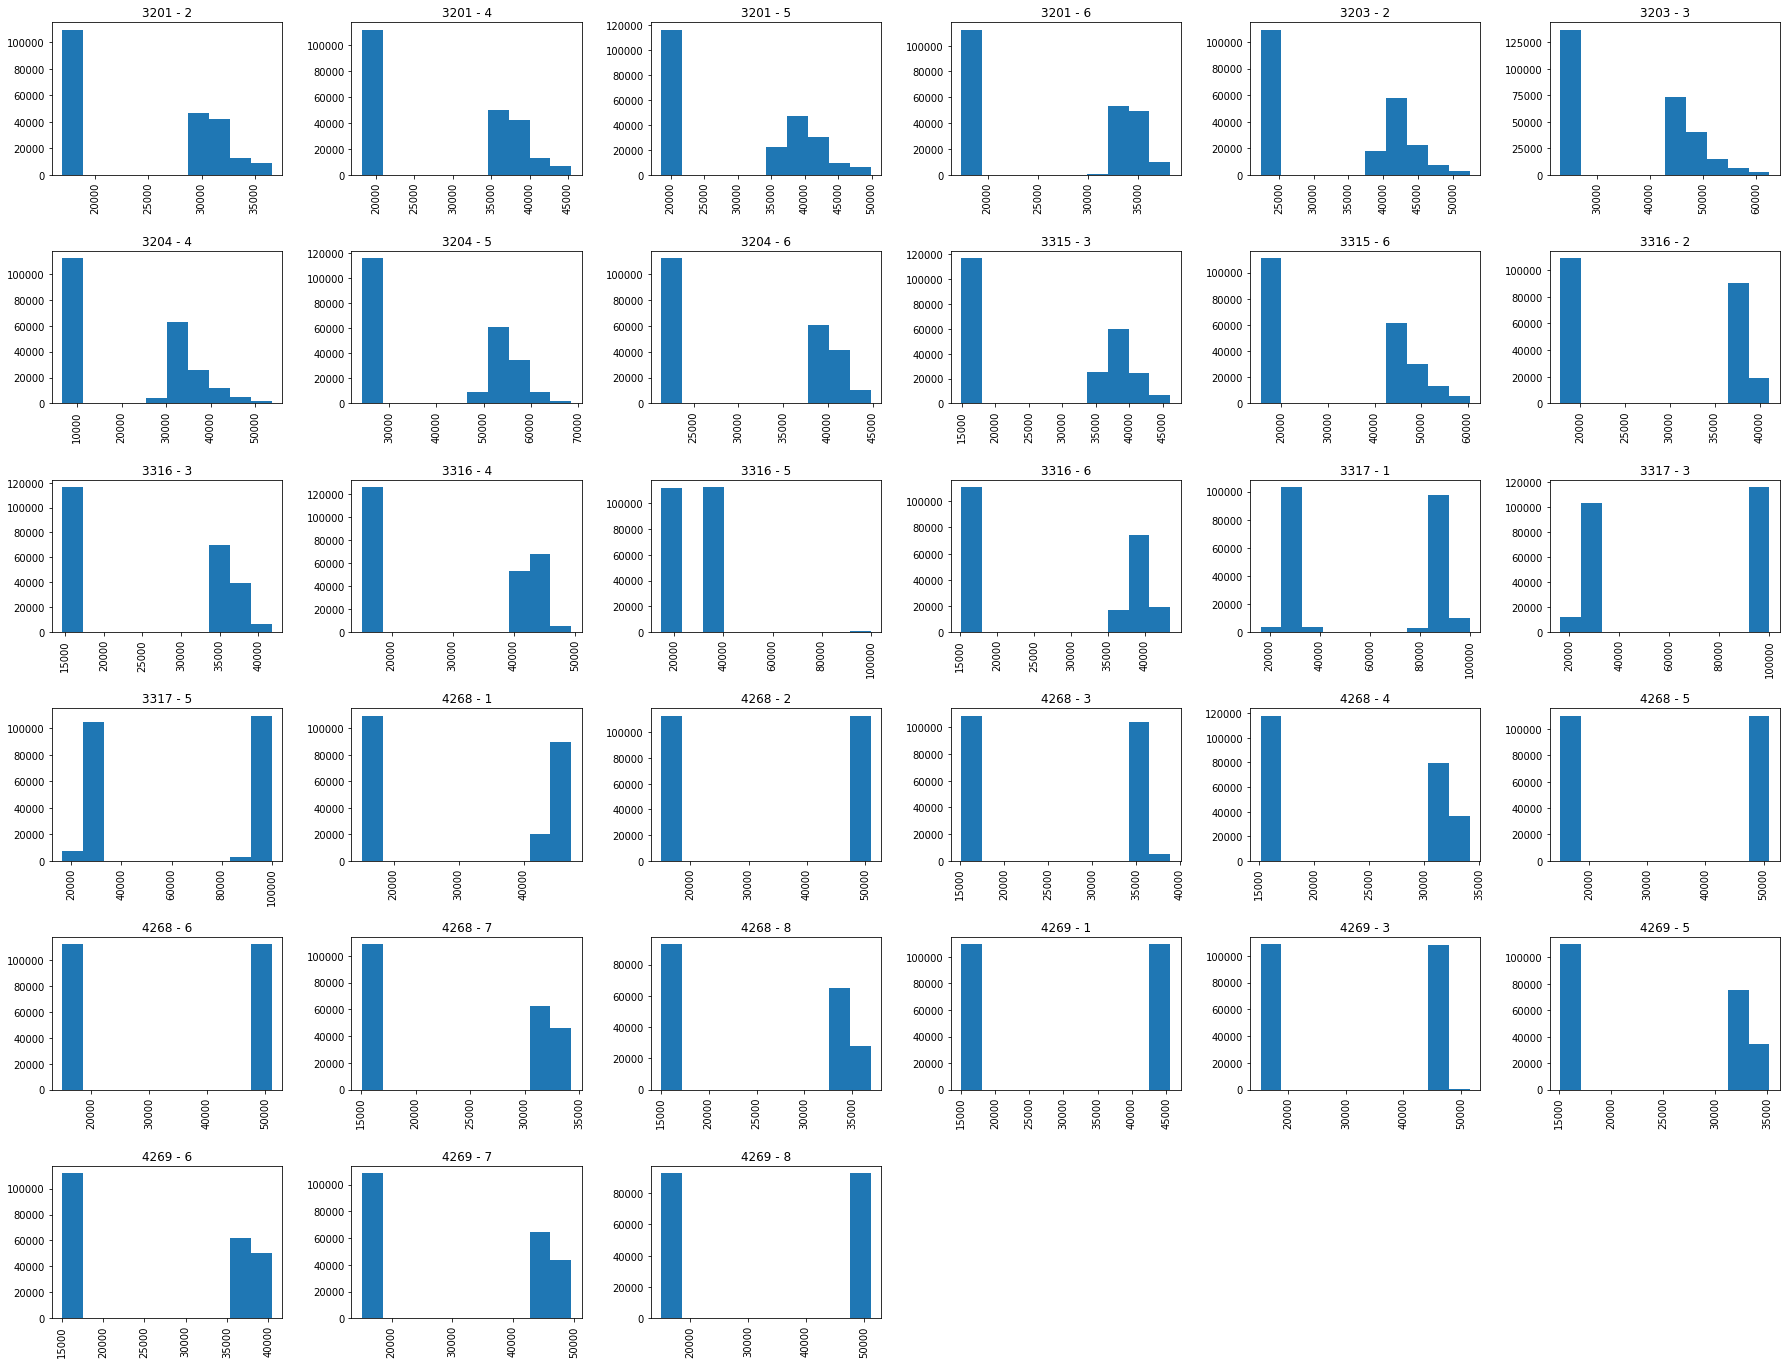

In [297]:
aux = photometry_data.copy()
aux['group'] = aux['subject'] + ' - ' + aux['day']
aux['gcamp_mod'].hist(by=aux['group'],figsize = (30,24));

In [298]:
photometry_data.describe()

,timestamp,gcamp,threshold,gcamp_mod
count,7382370.0000,7382370.0000,7382370.0000,7382370.0000
mean,50910624.4901,37949.5560,1600.0000,31989.2032
std,6664312.3600,44025.1304,0.0000,18802.8810
min,32523149.9648,14653.0000,1600.0000,6695.3000
25%,47682555.9296,15808.0000,1600.0000,15763.0000
50%,51937530.6752,31980.0000,1600.0000,30168.0000
75%,55640192.9312,43337.0000,1600.0000,41442.0000
max,63125123.5584,536921.0000,1600.0000,100000.0000


In [299]:
behavioral_data.to_csv("../processed/analog_data.csv", index=False)

In [300]:
photometry_data.to_csv("../processed/photometry_data.csv", index=False)

In [305]:
behavioral_data[(behavioral_data['subject']=='3317') & (behavioral_data['day']=='1')][]

,timestamp,lp,he,rew,subject,threshold,day
1,45382298.9568,0.0000,0.0000,0.0000,3317,1600,1
2,45382303.0912,0.0000,0.0000,0.0000,3317,1600,1
3,45382307.2128,0.0000,0.0000,0.0000,3317,1600,1
4,45382307.2256,0.0000,0.0000,0.0000,3317,1600,1
5,45382311.2192,0.0000,0.0000,0.0000,3317,1600,1
...,...,...,...,...,...,...,...
1814837,50936660.2880,0.0000,0.0000,0.0000,3317,1600,1
1814838,50936664.4352,0.0000,0.0000,0.0000,3317,1600,1
1814839,50936668.5568,0.0000,0.0000,0.0000,3317,1600,1
1814840,50936672.5504,0.0000,0.0000,0.0000,3317,1600,1
